In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyEXP 
import nba
import EXPtools
import gala.potential as gp

In [26]:
import os

In [27]:
# Declare variables 
MODEL_NAME = 'MW_GC21_Hernquist_model.txt'
BASIS_NAME = 'MW_GC21_Hernquist_basis.yaml' 
COEFS_NAME = 'MW_GC21_Hernquist_basis_coefs.hdf5'
SIMS_PATH = '/home/ngc/Work/research/mwlmc_sims'
SNAP_NAME = 'MWLMC5_100M_b1_vir_OM3_G4_111.hdf5'

# 1. Load halo particles

In [28]:
MWhalo = nba.ios.ReadGC21(SIMS_PATH, SNAP_NAME)

In [29]:
MW = MWhalo.read_halo(['pos', 'mass'], halo='MW', ptype='dm', randomsample=100_000) ## Add random sampler

(-100.0, 100.0)

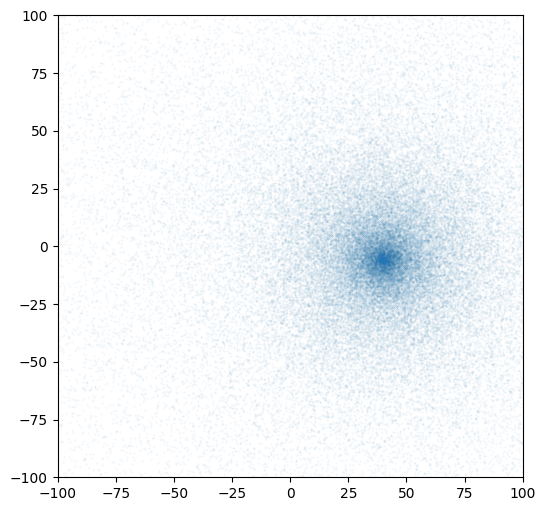

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(MW['pos'][:,1], MW['pos'][:,2], s=0.1, alpha=0.1)
plt.xlim(-100, 100)
plt.ylim(-100, 100)

In [31]:
ORBIT_PATH = '/home/ngc/Work/research/XMC-Atlas/scripts/output/MWLMC5/MWLMC5_100M_b1_vir_OM3_G4_nba_halo_pot.txt'

In [32]:
halo_com = np.loadtxt(ORBIT_PATH)

In [33]:
com = halo_com[110,:3]
print(com)

[ 7.30591059 39.58641052 -5.15278339]


In [34]:
edges = np.linspace(0.1, 300, 300)

In [35]:
#sample_factor = npart / npart_sample
Mtot = np.sum(MW['mass']) *1000 #* sample_factor
Mencl = np.sum(MW['mass'][np.where(np.linalg.norm(MW['pos'], axis=1)<edges[-1])]) *1000 #* sample_factor

print('Mtot', Mtot)
print('Mencl', Mencl)

Mtot 157.6487272977829
Mencl 122.77813255786896


# 2. Density profile

In [13]:
HaloStructure = nba.structure.Profiles(MW['pos'], edges=edges)

In [14]:
rcen, rho_halo = HaloStructure.density(mass=MW['mass'])

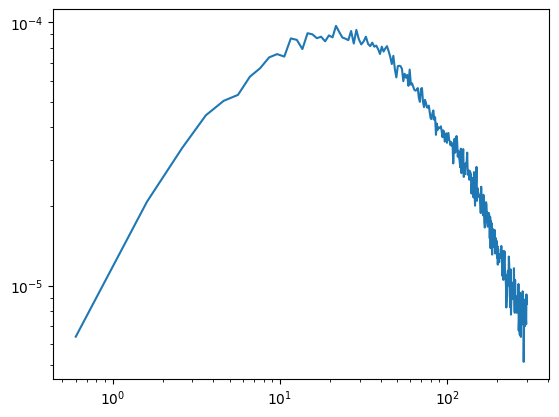

In [15]:
plt.loglog(rcen, rho_halo*rcen**2)


# 2. Compute basis 

## 2.1 Compute density profile

## 2.2 Compare density profile with fit and model 

In [ ]:
gp.potential.load('../../GC21/mo')

In [29]:
Hern_anpot = gp.HernquistPotential(m=Mtot, c=40.85)
grid = np.zeros((3, len(rcen)))
grid[0] = rcen 
Hern_profile = Hern_anpot.density(grid)

In [32]:
Hern_profile.value

array([2.39354901e-02, 8.35193374e-03, 4.79158310e-03, 3.23152008e-03,
       2.36525418e-03, 1.81974706e-03, 1.44819573e-03, 1.18117022e-03,
       9.81614790e-04, 8.27976043e-04, 7.06882773e-04, 6.09613254e-04,
       5.30245579e-04, 4.64624673e-04, 4.09754296e-04, 3.63423285e-04,
       3.23967182e-04, 2.90111378e-04, 2.60865042e-04, 2.35447680e-04,
       2.13237218e-04, 1.93732602e-04, 1.76526422e-04, 1.61284561e-04,
       1.47730869e-04, 1.35635477e-04, 1.24805792e-04, 1.15079477e-04,
       1.06318938e-04, 9.84069509e-05, 9.12431658e-05, 8.47412959e-05,
       7.88268346e-05, 7.34351957e-05, 6.85101860e-05, 6.40027451e-05,
       5.98699000e-05, 5.60738928e-05, 5.25814512e-05, 4.93631736e-05,
       4.63930101e-05, 4.36478228e-05, 4.11070106e-05, 3.87521893e-05,
       3.65669171e-05, 3.45364586e-05, 3.26475811e-05, 3.08883789e-05,
       2.92481199e-05, 2.77171133e-05, 2.62865934e-05, 2.49486179e-05,
       2.36959799e-05, 2.25221293e-05, 2.14211043e-05, 2.03874708e-05,
      

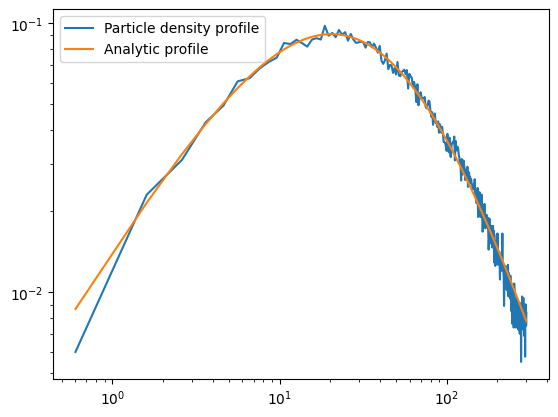

In [88]:
plt.loglog(rcen, rcen**2 * rho_halo*sample_factor, label='Particle density profile')
plt.loglog(rcen, rcen**2 * Hern_profile, label='Analytic profile')
plt.legend()

In [120]:
model = EXPtools.make_model(rcen, rho_pot2, Mtotal=Mtot, output_filename=MODEL_NAME, physical_units=True)
R = model['radius']
M = model['mass']
D = model['density']
P = model['potential']

NameError: name 'rho_pot2' is not defined

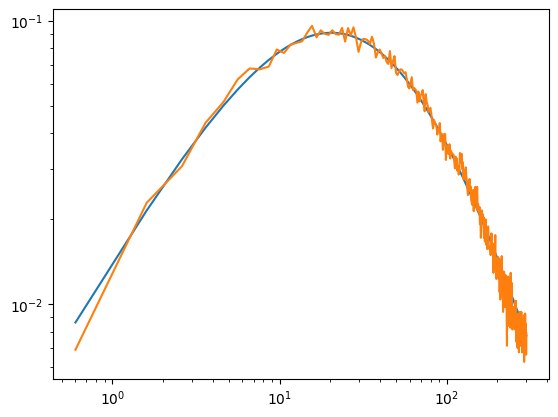

In [47]:
plt.loglog(R, D*R**2/1e10)
plt.loglog(rcen, rcen**2 * rho_halo*sample_factor, label='Particle density profile')


In [ ]:
class BuildBasis:
    def init(basis_path, basis_name, nmax, lmax):
        self.basis_outname = os.join.path(basis_path, basis_name)
        self.nmax, self.lmax = 

    def model():
        model = EXPtools.make_model(rbins, halo_dens_profile, Mtotal=Mtot, output_filename='gala_hernquist_test', physical_units=True)
        R = model['radius']
        M = model['mass']
        return R, M
    
    def make_basis(self, model_name):
        basis_params = {
        'basis_id' : 'sphereSL',
        'nmax' : nmax, 
        'lmax' : lmax 
        }


        config = EXPtools.make_config(basis_id='sphereSL', 
                                lmax=lmax, nmax=nmax,
                                rmapping=R[-1], modelname=model_name,
                                cachename='.test_GC21_Spherical_{:03d}'.format(nmax))
        
        basis = pyEXP.basis.Basis.factory(config)
        EXPtools.write_basis(config, BASIS_NAME)
        return basis

    def create_basis_from_gala_potential(self, potential, model_name, basis_path, basis_name, rbins, component):
        pot = gp.potential.load()
        # make model
        dens_profile = pot['halo'].density(rbins).value
        Mtot = MWpot['halo'].parameters['m'].value
        #
        # assert rbins here
        model = EXPtools.make_model(rbins[0], dens_profile, Mtotal=Mtot, output_filename=model_name, physical_units=True)
        basis = make_basis(model_name)


In [74]:
MWpot = gp.potential.load('../../GC21/GC21LMC1.potential')
MWpot['halo'].parameters
Mtot = MWpot['halo'].parameters['m'].value/1e10

! Scaling: R = 300.0  M = 157.0
Scaling factors: rfac = 1.0, dfac = 1.0, mfac = 1.0, pfac = 1.0


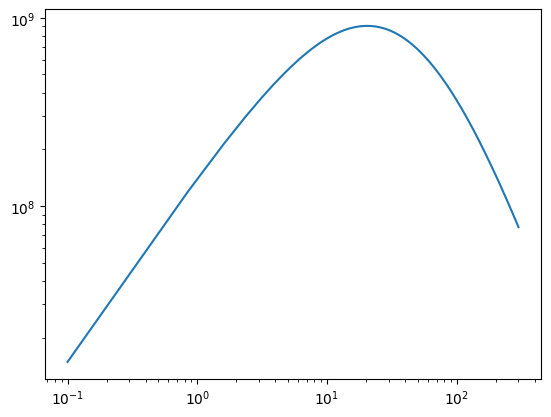

In [82]:
plt.loglog(R, D*R**2)

In [95]:
def make_gala_grid(rbins, axis=0):
    grid = np.zeros((3, len(rbins)))
    grid[axis] = rbins 
    return grid

def make_basis(model_name, nmax, lmax):
    basis_params = {
    'basis_id' : 'sphereSL',
    'nmax' : nmax, 
    'lmax' : lmax 
    }
    model = np.loadtxt(model_name, skiprows=3)
    R = model[:,0]
    config = EXPtools.make_config(basis_id='sphereSL', 
                              lmax=lmax, nmax=nmax,
                              rmapping=R[-1], modelname=model_name,
                              cachename='.test_GC21_Spherical_{:03d}'.format(nmax))
    
    basis = pyEXP.basis.Basis.factory(config)
    #EXPtools.write_basis(config, BASIS_NAME)
    return basis

def create_coefs(basis, mass, pos):
    coef = basis.createFromArray(mass, pos, 0.0)
    coefs = pyEXP.coefs.Coefs.makecoefs(coef, name='halo')
    coefs.add(coef)
    return coefs


rbins = np.logspace(1, 2.5, 400)
gala_grid = make_gala_grid(rbins)
halo_dens_profile = MWpot['halo'].density(gala_grid).value

model = EXPtools.make_model(rbins, halo_dens_profile, Mtotal=Mtot, output_filename='gala_hernquist_test', physical_units=True)
R = model['radius']
M = model['mass']
#D = model['density']
#P = model['potential']




! Scaling: R = 316.2277660168379  M = 157.0
Scaling factors: rfac = 1.0, dfac = 1.0, mfac = 1.0, pfac = 1.0


In [96]:
GC21_hern_basis_20_8 = make_basis('gala_hernquist_test', 20, 8)

---- SLGridSph::WriteH5Cache: wrote <.test_GC21_Spherical_020>
---- Spherical::orthoTest: worst=1.540623e-02


---- SLGridSph::ReadH5Cache: error reading <.test_GC21_Spherical_020>
---- SLGridSph::ReadH5Cache: HDF5 error is <Unable to open file .test_GC21_Spherical_020 (File accessibility) Unable to open file>


In [ ]:
#GC21_MW_basis = EXPtools.load_basis('GC21_MW_DM_halo_10_8.yaml')

In [ ]:
#GC21_MW_basis_ = EXPtools.load_basis('GC21_MW_DM_halo_10_8.yaml')

---- SLGridSph::ReadH5Cache: successfully read basis cache <cache_GC21_MW_DM_halo_10_8.h5>
---- Spherical::orthoTest: worst=0.0158575


In [ ]:
GC21_MW_coefs = create_coefs(GC21_MW_basis, MW['mass'], MW['pos']-com)

In [97]:
GC21_MW_coefs = create_coefs(GC21_hern_basis_20_8, MW['mass'], MW['pos']-com)

In [42]:
GC21_MW_coefs.Power()

array([[2.45819664e-03, 1.56209878e-06, 7.91180153e-07, 1.21098914e-07,
        7.03824809e-08, 4.46229215e-08, 2.79276577e-08, 3.27550059e-08,
        2.87586233e-08]])

In [98]:
npoints=40
time=0.0
ymin=-400
ymax=400
zmin=-400
zmax=400



In [99]:
xyz_grid = EXPtools.visuals.Grid3D('cartesian', ranges=[(-50, 50),(ymin, ymax), (zmin, zmax)], num_points=npoints)
xyz_grid = xyz_grid.to('cartesian')
fields = pyEXP.field.FieldGenerator([time], xyz_grid)

In [101]:
rho_mw_mon = fields.points(GC21_hern_basis_20_8, GC21_MW_coefs)[time]['dens m=0'].reshape((npoints, npoints, npoints))

In [102]:
rho_mw = fields.points(GC21_hern_basis_20_8, GC21_MW_coefs)[time]['dens'].reshape((npoints, npoints, npoints))

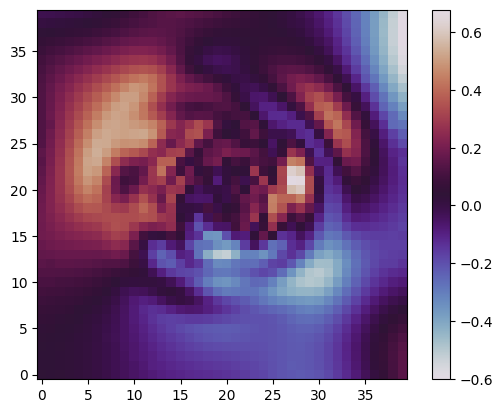

In [103]:
plt.imshow((np.mean(rho_mw, axis=0).T)/(np.mean(rho_mw_mon, axis=0).T)-1, origin='lower', cmap='twilight')
plt.colorbar()

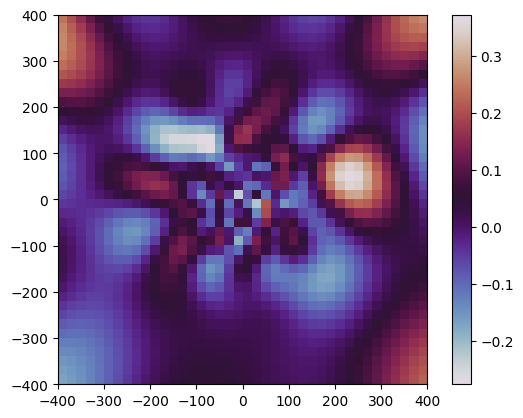

In [96]:
plt.imshow(((rho_mw/rho_mw_mon)-1).T, extent=[ymin, ymax, zmin, zmax], cmap='twilight', origin='lower')
plt.colorbar()

In [108]:
def spherical_density_profile(basis, coefs, r, npoints=5):
    spherical_grid = EXPtools.visuals.Grid3D('spherical', ranges=[(r,r+0.001), None, None], num_points=npoints)
    xyz_sph = spherical_grid.to('cartesian')
    fields = pyEXP.field.FieldGenerator([0.0], xyz_sph)
    sph_fields = fields.points(basis, coefs)[0.0]['dens m=0']
    sph_fields_all = fields.points(basis, coefs)[0.0]['dens']
    return np.mean(sph_fields), np.mean(sph_fields_all)

In [109]:
#rbins_bfe = np.logspace(0, 2.5, 49)
rho_mean_sph = np.zeros_like(rcen)

for r in range(len(rcen)):
    _, rho_mean_sph[r] = spherical_density_profile(GC21_hern_basis_10_8, GC21_MW_coefs,  rcen[r])

In [44]:
plt.loglog(rcen, rho_mean_sph*rcen**2)
plt.loglog(rcen, rho_halo*rcen**2)

NameError: name 'rho_mean_sph' is not defined

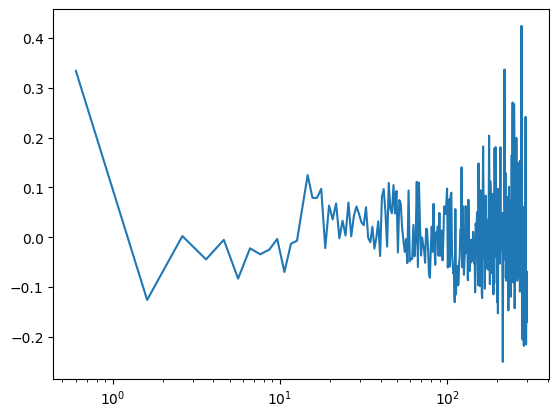

In [112]:
plt.semilogx(rcen, rho_mean_sph/rho_halo - 1)

## 2.3 Compute best fit of density profile 

In [597]:
def fit_twopl(params, radius):
    amplitud = params[0]
    scale_radius = params[1]
    alpha = params[2]
    beta = params[3]
    rc= params[4]

    rho_model = EXPtools.basis_builder.Profiles(radius, 
                                                scale_radius=scale_radius,
                                                alpha=alpha, beta=beta,
                                                amplitud=amplitud)
    return rho_model.power_halo(rc)

fit_params = [0.003, 40.85, 1, 3, 1]
params_guess = [(1e-7, 1e-6), (20, 60.86), (0.9, 1.81), (2, 3.51), (0, 2)]


In [598]:
rho_fit_twopl, fit_params_twopl = EXPtools.basis_builder.make_Dfit(rbins, halo_rho_profile, fit_twopl,
                                                                   params_guess=fit_params, params_bounds=params_guess)

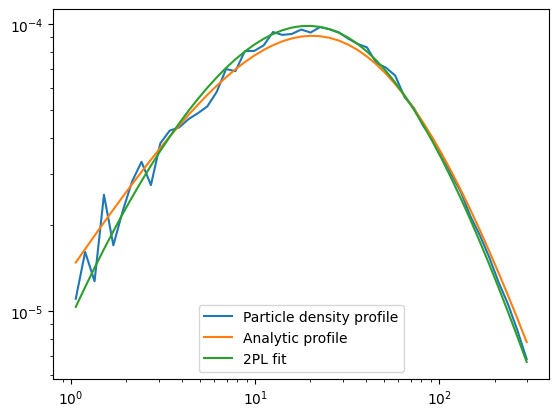

In [599]:
plt.loglog(rbins, rbins**2 * halo_rho_profile, label='Particle density profile')
plt.loglog(rbins, rbins**2 * Hern_profile, label='Analytic profile')
plt.loglog(rbins, rbins**2 * rho_fit_twopl, label='2PL fit')
plt.legend()

In [600]:
print('Best fit params (amplitude, scale length, alpha, beta, rcore): \n', fit_params_twopl)

Best fit params (amplitude, scale length, alpha, beta, rcore): 
 [4.10119224e-07 4.08165698e+01 1.06835637e+00 3.05885399e+00
 1.00387189e+00]


In [604]:
fit_amplitud = fit_params_twopl[0]
print(fit_amplitud)

4.101192240890656e-07


In [615]:
# density profiles differences:
def delta_profiles(profile_fit, profiles):
    log_D0_init = np.log10(np.maximum(profile_fit, 1e-12))
    delta_D = np.zeros_like(profiles)
    nsnaps = len(profiles)
    for d in range(nsnaps):
        log_D_snap = np.log10(np.maximum(profiles[d], 1e-12))
        delta_D[d] = ((log_D0_init - log_D_snap)**2)
    return delta_D

In [616]:
rho_diff = delta_profiles(rho_fit_twopl, [halo_rho_profile])

(-0.001, 0.01)

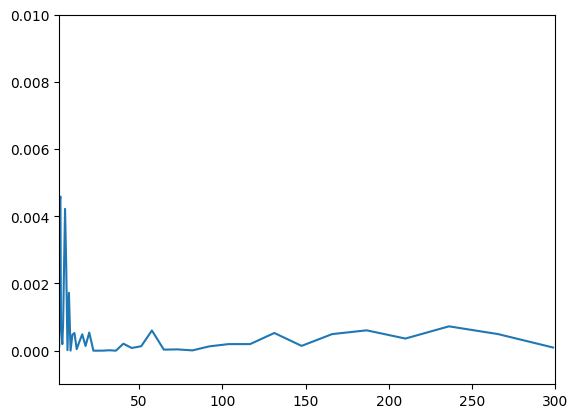

In [617]:
plt.plot(rbins, rho_diff[0])
plt.xlim(2, 300)
plt.ylim(-0.001, 0.01)

In [618]:
rbins_model = np.logspace(-2, 2.5, 500)
rho_fit_model = EXPtools.Profiles(rbins_model, scale_radius=fit_params_twopl[1],
                                               alpha=fit_params_twopl[2], 
                                               beta=fit_params_twopl[3],
                                               amplitud=fit_params_twopl[0])
rho_fit= rho_fit_model.power_halo(fit_params_twopl[4])

In [619]:
model = EXPtools.make_model(rbins_model, rho_fit, Mtotal=Mtot, output_filename='test_MW_GC21_model.txt', physical_units=True)

! Scaling: R = 316.2277660168379  M = 0.1576329276249453
Scaling factors: rfac = 1.0, dfac = 1.0, mfac = 1.0, pfac = 1.0


#### Note that in Mtot we pass the total mass of the halo

In [620]:
R = model['radius']
D = model['density']
M = model['mass']
P = model['potential']

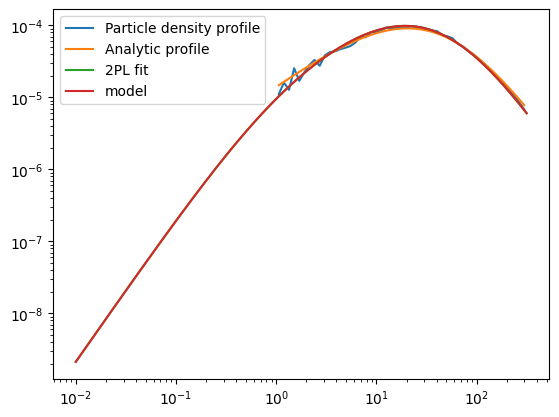

In [621]:
plt.loglog(rbins, rbins**2 * halo_rho_profile, label='Particle density profile')
plt.loglog(rbins, rbins**2 * Hern_profile, label='Analytic profile')
plt.loglog(rbins_model, rbins_model**2*rho_fit, label='2PL fit')
plt.loglog(R, D*R**2, label='model')
plt.legend()

In [684]:
def make_basis(nmax, lmax):
    basis_params = {
    'basis_id' : 'sphereSL',
    'nmax' : nmax, 
    'lmax' : lmax 
    }
    config = EXPtools.make_config(basis_id='sphereSL', 
                              lmax=lmax, nmax=nmax, rmapping=R[-1], modelname='test_MW_GC21_model.txt',
                              cachename='.test_GC21_Spherical_{:03d}'.format(nmax))
    
    basis = pyEXP.basis.Basis.factory(config)
    #EXPtools.write_basis(config, 'test_GC21_DPL_basis_{}_{}.yaml'.format(nmax, lmax))
    return basis

In [685]:
basis_n5 = make_basis(5, 2)
basis_n10 = make_basis(10, 2)
basis_n15 = make_basis(15, 2)
basis_n20 = make_basis(20, 2)

---- SLGridSph::ReadH5Cache: error reading <.test_GC21_Spherical_005>
---- SLGridSph::ReadH5Cache: HDF5 error is <Unable to open file .test_GC21_Spherical_005 (File accessibility) Unable to open file>
---- SLGridSph::ReadH5Cache: error reading <.test_GC21_Spherical_010>
---- SLGridSph::ReadH5Cache: HDF5 error is <Unable to open file .test_GC21_Spherical_010 (File accessibility) Unable to open file>


---- SLGridSph::WriteH5Cache: wrote <.test_GC21_Spherical_005>
---- Spherical::orthoTest: worst=0.00151474
---- SLGridSph::WriteH5Cache: wrote <.test_GC21_Spherical_010>
---- Spherical::orthoTest: worst=0.00566223
---- SLGridSph::WriteH5Cache: wrote <.test_GC21_Spherical_015>


---- SLGridSph::ReadH5Cache: error reading <.test_GC21_Spherical_015>
---- SLGridSph::ReadH5Cache: HDF5 error is <Unable to open file .test_GC21_Spherical_015 (File accessibility) Unable to open file>
---- SLGridSph::ReadH5Cache: 

---- Spherical::orthoTest: worst=0.0146919
---- SLGridSph::WriteH5Cache: wrote <.test_GC21_Spherical_020>
---- Spherical::orthoTest: worst=0.0268159


error reading <.test_GC21_Spherical_020>
---- SLGridSph::ReadH5Cache: HDF5 error is <Unable to open file .test_GC21_Spherical_020 (File accessibility) Unable to open file>


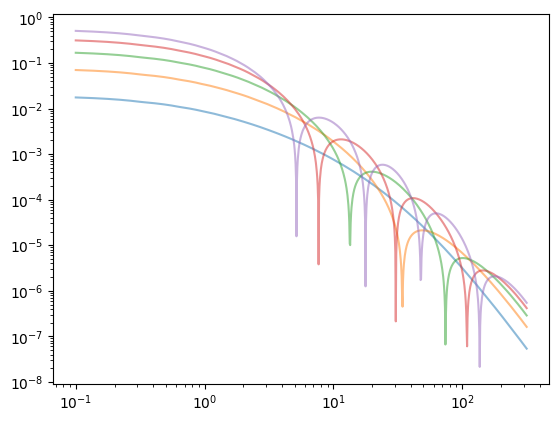

In [686]:
rbasis = np.logspace(-1, 2.5, 1000)
for n in range(0, 5):
    plt.loglog(rbasis, np.abs(basis_n5.getBasis(logxmin=np.log10(rbasis[0]),
                                                 logxmax=np.log10(rbasis[-1]),
                                                 numr=len(rbasis))[0][n]['density']), alpha=0.5)

In [687]:
def create_coefs(basis, mass, pos):
    coef = basis.createFromArray(mass, pos, 0.0)
    coefs = pyEXP.coefs.Coefs.makecoefs(coef, name='halo')
    coefs.add(coef)
    return coefs

In [688]:
coefs_n5 = create_coefs(basis_n5, mass, pos)
coefs_n15 = create_coefs(basis_n15, mass, pos)
coefs_n10 = create_coefs(basis_n10, mass, pos)
coefs_n20 = create_coefs(basis_n20, mass, pos)

In [689]:
print(coefs_n20.Power())

[[2.49152227e-03 1.53058365e-06 3.91309911e-07]]


In [697]:
# include this in EXPtools! 

In [690]:
def spherical_density_profile(basis, coefs, r, npoints=5):
    spherical_grid = EXPtools.visuals.Grid3D('spherical', ranges=[(r,r+0.001), None, None], num_points=npoints)
    xyz_sph = spherical_grid.to('cartesian')
    fields = pyEXP.field.FieldGenerator([0.0], xyz_sph)
    sph_fields = fields.points(basis, coefs)[0.0]['dens m=0']
    sph_fields_all = fields.points(basis, coefs)[0.0]['dens']
    return np.mean(sph_fields), np.mean(sph_fields_all)

In [691]:
field = pyEXP.field.FieldGenerator([0.0], grid.T)
tt = field.points(basis_n5, coefs_n5)[0.0]['dens']

In [692]:
#rbins_bfe = np.logspace(0, 2.5, 49)
rho_mean_sph_n5 = np.zeros_like(rbins)
rho_mean_sph_n10 = np.zeros_like(rbins)
rho_mean_sph_n15 = np.zeros_like(rbins)
rho_mean_sph_n20 = np.zeros_like(rbins)

for r in range(len(rbins)):
    _, rho_mean_sph_n5[r] = spherical_density_profile(basis_n5, coefs_n5,  rbins[r])
    _, rho_mean_sph_n10[r] = spherical_density_profile(basis_n10, coefs_n10, rbins[r])
    _, rho_mean_sph_n15[r] = spherical_density_profile(basis_n15, coefs_n15,  rbins[r])
    _, rho_mean_sph_n20[r] = spherical_density_profile(basis_n20, coefs_n20, rbins[r])
    

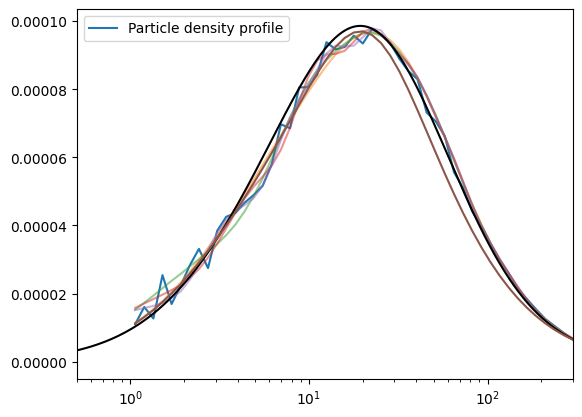

In [693]:
plt.semilogx(rbins, rbins**2 * halo_rho_profile, label='Particle density profile')
plt.semilogx(rbins, rbins**2 * rho_mean_sph_n5, alpha=0.5)
plt.semilogx(rbins, rbins**2 * rho_mean_sph_n10, alpha=0.5)
plt.semilogx(rbins, rbins**2 * rho_mean_sph_n15, alpha=0.5)
plt.semilogx(rbins, rbins**2 * rho_mean_sph_n20, alpha=0.5)
plt.semilogx(R, D*R**2, c='k')
plt.semilogx(rbins, rbins**2 * tt)
plt.xlim(0.5, 300)
plt.legend()

In [694]:
rho_diff_n5 = delta_profiles(rho_mean_sph_n5, [halo_rho_profile])
rho_diff_n10 = delta_profiles(rho_mean_sph_n10, [halo_rho_profile])
rho_diff_n15 = delta_profiles(rho_mean_sph_n15, [halo_rho_profile])
rho_diff_n20 = delta_profiles(rho_mean_sph_n20, [halo_rho_profile])

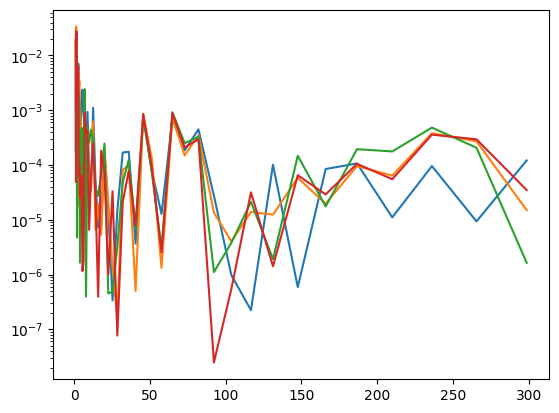

In [695]:
plt.semilogy(rbins, np.abs(rho_diff_n5[0]-halo_rho_profile))
plt.semilogy(rbins, np.abs(rho_diff_n10[0]-halo_rho_profile))
plt.semilogy(rbins, np.abs(rho_diff_n15[0]-halo_rho_profile))
plt.semilogy(rbins, np.abs(rho_diff_n20[0]-halo_rho_profile))
#plt.xlim(5, 300)
#plt.ylim(0, 0.006)